<h1>Uber Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('uber-raw-data-sep14.csv')

In [3]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
df.shape

(1028136, 4)

In [5]:
df['Date/Time'].sample(5)

1003248    9/27/2014 18:03:00
293594      9/2/2014 21:43:00
761772     9/17/2014 10:06:00
471619      9/16/2014 7:08:00
395979     9/10/2014 12:51:00
Name: Date/Time, dtype: object

In [6]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [7]:
df['Date/Time'].sample(5)

621171    2014-09-28 00:37:00
581887    2014-09-25 05:51:00
749815    2014-09-15 14:16:00
1011791   2014-09-28 16:44:00
326783    2014-09-05 10:53:00
Name: Date/Time, dtype: datetime64[ns]

In [8]:
def get_dom(dt):
    return dt.day
df['dom']=df['Date/Time'].map(get_dom)

In [9]:
def get_weekday(dt):
    return dt.weekday()
df['weekday']=df['Date/Time'].map(get_weekday)
def get_hour(dt):
    return dt.hour
df['hour']=df['Date/Time'].map(get_hour)

In [10]:
df.sample(5)

,Date/Time,Lat,Lon,Base,dom,weekday,hour
118102,2014-09-11 13:36:00,40.7659,-73.9544,B02598,11,3,13
684018,2014-09-05 22:11:00,40.7327,-73.9835,B02682,5,4,22
53763,2014-09-03 22:48:00,40.6722,-73.9772,B02598,3,2,22
33256,2014-09-29 19:48:00,40.7306,-74.0090,B02512,29,0,19
749573,2014-09-15 13:12:00,40.7219,-74.0002,B02682,15,0,13


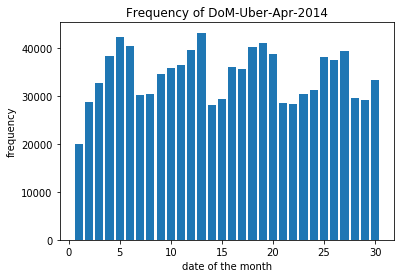

In [11]:
plt.hist(df.dom,bins=30,rwidth=.8,range=(0.5,30.5))
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency of DoM-Uber-Apr-2014')
plt.show()

In [12]:
def count_rows(rows):
    return len(rows)
by_date=df.groupby('dom').apply(count_rows)
by_date

dom
1     19961
2     28831
3     32631
4     38360
5     42319
6     40520
7     30134
8     30360
9     34560
10    35910
11    36439
12    39540
13    43205
14    28122
15    29454
16    36092
17    35531
18    40274
19    41017
20    38864
21    28620
22    28312
23    30316
24    31301
25    38203
26    37504
27    39468
28    29656
29    29201
30    33431
dtype: int64

<BarContainer object of 30 artists>

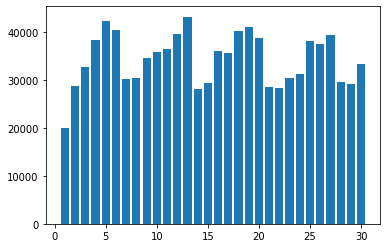

In [13]:
plt.bar(range(1,31),by_date)

In [14]:
by_date_sorted= by_date.sort_values()
by_date_sorted

dom
1     19961
14    28122
22    28312
21    28620
2     28831
29    29201
15    29454
28    29656
7     30134
23    30316
8     30360
24    31301
3     32631
30    33431
9     34560
17    35531
10    35910
16    36092
11    36439
26    37504
25    38203
4     38360
20    38864
27    39468
12    39540
18    40274
6     40520
19    41017
5     42319
13    43205
dtype: int64

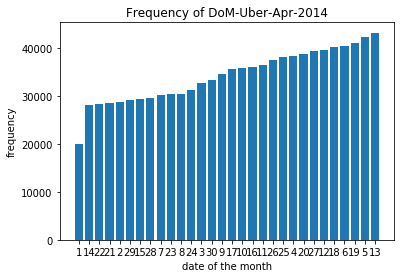

In [15]:
plt.bar(range(1,31),by_date_sorted)
plt.xticks(range(1,31),by_date_sorted.index)
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency of DoM-Uber-Apr-2014')
plt.show()

''

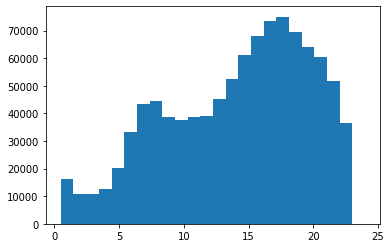

In [16]:
plt.hist(df.hour, bins=24, range=(.5, 24))
;

''

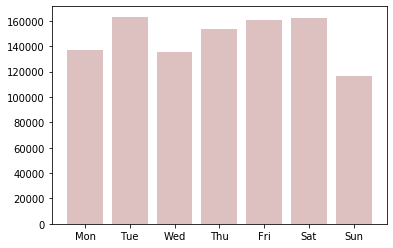

In [17]:
plt.hist(df.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
;

''

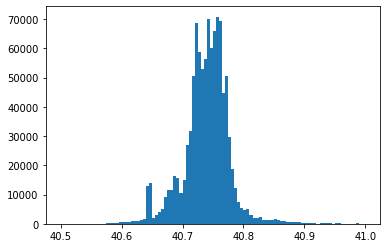

In [18]:
plt.hist(df['Lat'], bins=100, range = (40.5, 41))
;


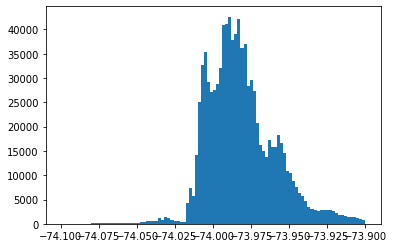

In [19]:
plt.hist(df['Lon'], bins=100, range = (-74.1, -73.9));

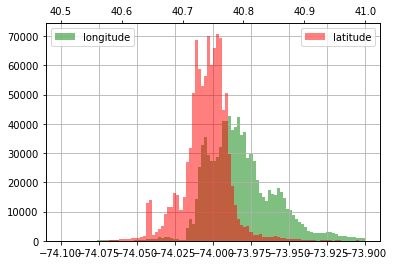

In [20]:
plt.hist(df['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
plt.grid()
plt.legend(loc='upper left')
plt.twiny()
plt.hist(df['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
plt.legend(loc='best');

(40.7, 41)

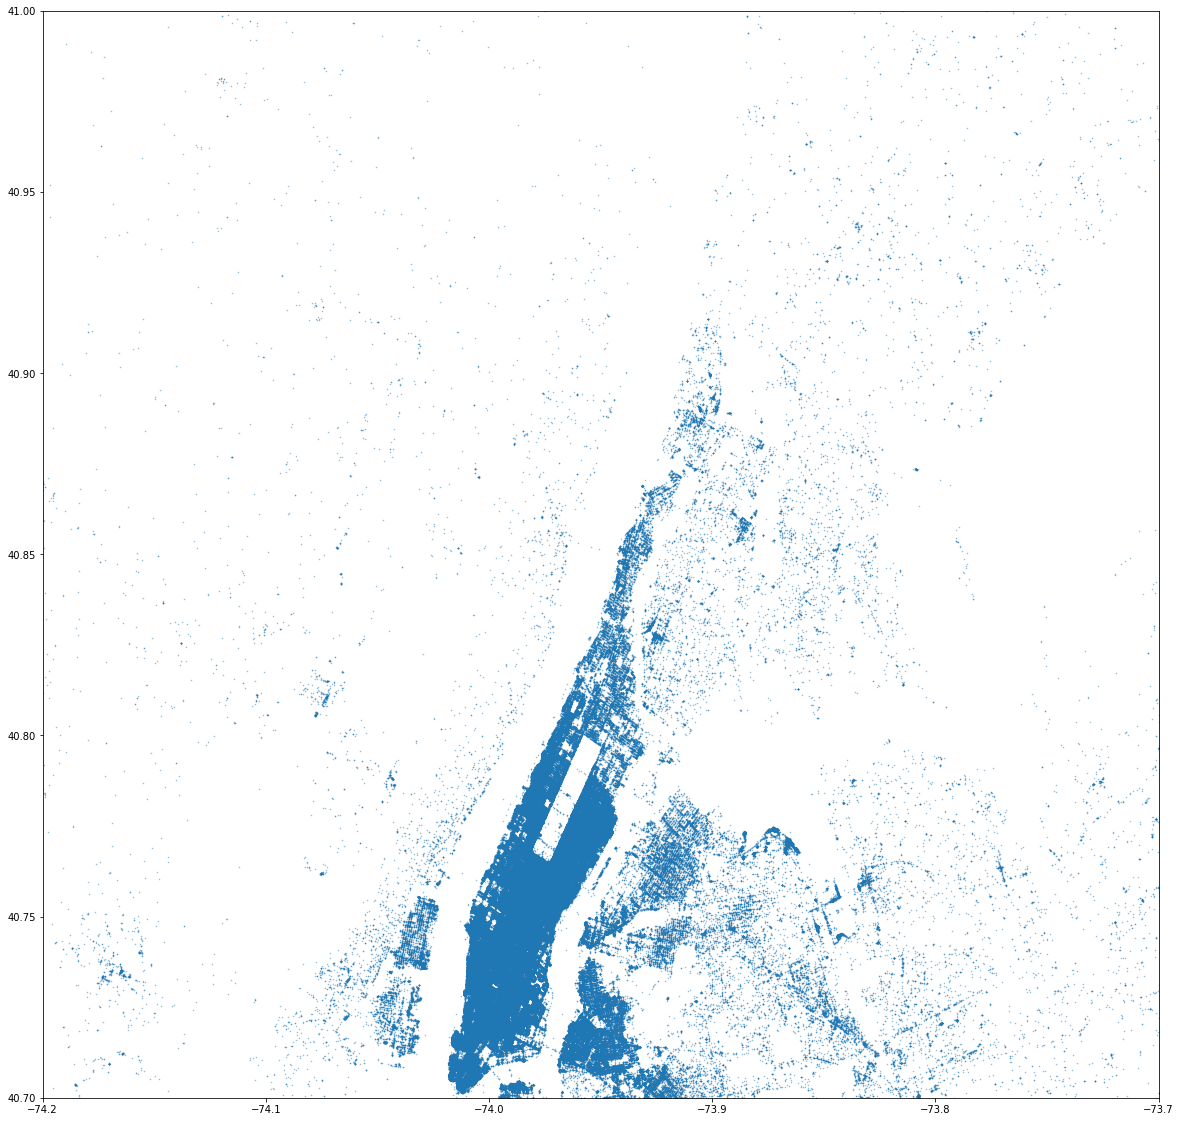

In [21]:
plt.figure(figsize=(20, 20))
plt.plot(df['Lon'], df['Lat'], '.', ms=1, alpha=.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)